In [1]:
import json
import pandas as pd
import textacy
from textacy.io.json import read_json
import spacy
import random
import scipy
import numpy as np

# Note that GCC doesn't really help...
# Try this?
# CPPFLAGS="-std=c++98" pip install cld2-cffi

# This only really gets used to create the dataset. You _dont_ have to install this if you don't want to.

# def doc_stream():
#     c = 0
#     with open('./yelp.json') as jfile:
#         for obj in json.load(jfile):
#             if c >= 10000:
#                 break
#             if obj['stars'] != [] and random.randint(0, 10) == 0:
#                 c += 1
#                 print('.', end='')
#                 yield textacy.Doc(obj['review'][0], lang='en', metadata={'stars': obj['stars'], 'restaurant': obj['restaurant']})
                
# corpus = textacy.Corpus('en', docs=doc_stream())

# corpus

# vectorizer = textacy.Vectorizer(norm='l2', apply_idf=True, idf_type='smooth', min_df=5, max_df=0.95)
# doc_term_matrix = vectorizer.fit_transform((doc.to_terms_list(ngrams=1, named_entities=True, as_strings=True) for doc in corpus))
# 

# scipy.sparse.save_npz('./corpus.npz', doc_term_matrix)
# 

# y = np.array([c.metadata['stars'] for c in corpus])

# np.save('./ratings.npy', y)

In [2]:
y = np.load('./ratings.npy')
doc_term_matrix = scipy.sparse.load_npz('./corpus.npz')

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(doc_term_matrix, y, test_size=0.2, random_state=42)

In [ ]:
# Classifications

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

classifiers = [GaussianNB(),
               # KNeighborsClassifier(n_neighbors=3), # This is slow as molasses
               RandomForestClassifier(random_state=42),
               SVC(),
               SVC(kernel='linear'),
               SGDClassifier()]

X_train, X_test, y_train, y_test = train_test_split(doc_term_matrix, y, test_size=0.2, random_state=42)

for clf in classifiers:
    clf.fit(X_train.toarray(), y_train)
    y_pred = clf.predict(X_test.toarray())
    print('Classifier {}'.format(clf))
    print('-' * 30)
    print(classification_report(y_test, y_pred))
    print('-' * 30)

# 
    
    

# train
# for clf in classifiers:
    

# Naive bayes
# KNN
# SVC
# Linear SVC
# SGD Classifier
# Random Forest

# Regressions
# SGD Regressor
# Lasso / Elastic Net
# SVR kernel = 'linear'
# SVR kernel = 'rbf'

# Note that there isn't any neural net stuff here

Classifier GaussianNB(priors=None)
------------------------------
             precision    recall  f1-score   support

          1       0.17      0.47      0.25       194
          2       0.09      0.22      0.13       156
          3       0.14      0.16      0.15       287
          4       0.34      0.23      0.27       577
          5       0.51      0.24      0.33       786

avg / total       0.34      0.25      0.26      2000

------------------------------
Classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
------------------------------
             precision    recall  f1-score   support

          1       0.45    

In [20]:
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression, ElasticNet, Ridge, LassoCV, RidgeCV
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
regressors = [SGDRegressor(), 
              Lasso(), 
              LinearRegression(), 
              ElasticNet(),
              Ridge()]
              # SVR(kernel='linear'),
              # SVR(kernel='rbf')]

def print_results(reg, y_test, y_pred):
    print('Regression {}'.format(reg))
    print('-' * 30)
    print(mean_absolute_error(y_test, y_pred))
    print('-' * 30)

for reg in regressors:
    reg.fit(X_train.toarray(), y_train)
    y_pred = reg.predict(X_test.toarray())
    print_results(reg, y_test, y_pred)

/home/hexgnu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Regression SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)
------------------------------
0.9879766926419168
------------------------------
Regression Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
------------------------------
1.044075625
------------------------------
Regression LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
------------------------------
105477975.95579632
------------------------------
Regression ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
     

/home/hexgnu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.2644476720300936e-18 / 1.1102230246251565e-16
  RuntimeWarning)


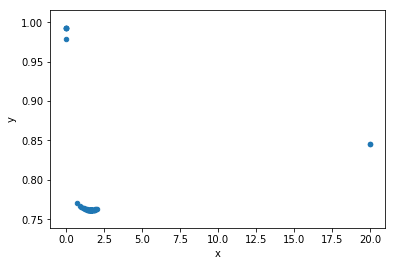

In [36]:
import dlib

xes = []
yes = []

def ridge_regressor(alpha):
    reg = Ridge(alpha=alpha)
    reg.fit(X_train.toarray(), y_train)
    y_pred = reg.predict(X_test.toarray())
    yes.append(mean_absolute_error(y_test, y_pred))
    xes.append(alpha)
    return mean_absolute_error(y_test, y_pred)

x, y = dlib.find_min_global(ridge_regressor, [1e-15], [20], 80)

import matplotlib.pyplot as plt

pd.DataFrame({'x': xes, 'y': yes}).plot.scatter(x='x', y='y')
plt.show()

4.472135954999583e-07
1.0860691398336608e-11
0.015654382891865923
199.99999999999991
1.2860346221007457
0.7168203456605755
8.968154351054606
0.6514805718366484
0.13343264594577492
0.28646844320706105
0.058736094136131484
0.3845614480054616
2.775618059646052
0.3615073602876391
28.968189573055394
0.36283390993715364
0.20142392086404354
0.3721119066177796
4.297049596193873
0.3661968642792087
1.7963203480116359
0.3635481726032028
0.4968208979459473
0.36238120714045596
0.9479148217967489
0.36285008905883337
0.03589391139167897
0.36261317799591464
0.09574078706044642
0.3627290739029955
0.24296013081972775
0.36279027949855086
0.16621178219620508
0.36282083175114316
0.5655657402122406
0.3628358899663458
0.4329892631773864
0.36283975518867995
0.322221049573726
0.3628359660710371
1.0933666728850058
0.3628349165638971
0.8142040232845562
0.362835491811018
2.1703940222182996
0.3628357602908493
1.496663531226705
0.36283583268214437
0.2215668045218548
0.36283591168874485
0.2648430970713287
0.36283587

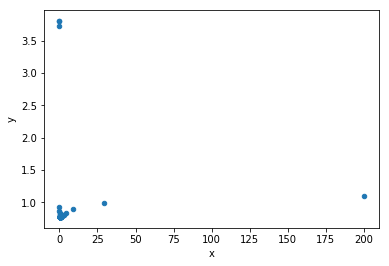

In [32]:
import dlib
from sklearn.svm import LinearSVR

xes = []
yes = []

def ridge_regressor(c):
    print(c)
    reg = LinearSVR(C=c)
    reg.fit(X_train.toarray(), y_train)
    y_pred = reg.predict(X_test.toarray())
    yes.append(mean_absolute_error(y_test, y_pred))
    xes.append(c)
    return mean_absolute_error(y_test, y_pred)

x, y = dlib.find_min_global(ridge_regressor, [1e-15], [200], 80)

import matplotlib.pyplot as plt

pd.DataFrame({'x': xes, 'y': yes}).plot.scatter(x='x', y='y')
plt.show()

In [27]:
pd.DataFrame({'x': xes, 'y': yes}).plot.scatter(x='x', y='y')
plt.show()

ValueError: scatter requires x column to be numeric

In [35]:
x

[0.3379809549008501]

In [20]:
import autosklearn

automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='/tmp/autosklearn_regression_example_tmp',
    output_folder='/tmp/autosklearn_regression_example_out',
)

automl.fit(X_train.toarray(), y_train, dataset_name='viet_ratings', feat_type=['numerical'] * X_test.shape[1])

print(automl.show_models())
y_pred = automl.predict(X_test.toarray())
print("Mean absolute error:", sklearn.metrics.mean_absolute_error(y_test, y_pred))

/home/hexgnu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[WARNING] [2018-07-30 13:41:37,265:AutoMLSMBO(1)::viet_ratings] Could not find meta-data directory /home/hexgnu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/autosklearn/metalearning/files/r2_regression_dense
[WARNING] [2018-07-30 13:41:37,308:EnsembleBuilder(1):viet_ratings] No models better than random - using Dummy Classifier!
[WARNING] [2018-07-30 13:41:37,356:EnsembleBuilder(1):viet_ratings] No models better than random - using Dummy Classifier!
[WARNING] [2018-07-30 13:41:39,367:EnsembleBuilder(1):viet_ratings] No models better than random - using Dummy Classifier!
[WARNING] [2018-07-30 13:41:41,372:EnsembleBuilder(1):viet_ratings] No models better than random - using Dummy Classifier!


/home/hexgnu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/hexgnu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/hexgnu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[(0.600000, SimpleRegressionPipeline({'categorical_encoding:__choice__': 'one_hot_encoding', 'imputation:strategy': 'mean', 'preprocessor:__choice__': 'no_preprocessing', 'regressor:__choice__': 'random_forest', 'rescaling:__choice__': 'standardize', 'categorical_encoding:one_hot_encoding:use_minimum_fraction': 'True', 'regressor:random_forest:bootstrap': 'True', 'regressor:random_forest:criterion': 'mse', 'regressor:random_forest:max_depth': 'None', 'regressor:random_forest:max_features': 1.0, 'regressor:random_forest:max_leaf_nodes': 'None', 'regressor:random_forest:min_impurity_decrease': 0.0, 'regressor:random_forest:min_samples_leaf': 1, 'regressor:random_forest:min_samples_split': 2, 'regressor:random_forest:min_weight_fraction_leaf': 0.0, 'regressor:random_forest:n_estimators': 100, 'categorical_encoding:one_hot_encoding:minimum_fraction': 0.01},
dataset_properties={
  'task': 4,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'regression',
  's

ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.

In [24]:
automl.show_models()

"[(0.600000, SimpleRegressionPipeline({'categorical_encoding:__choice__': 'one_hot_encoding', 'imputation:strategy': 'mean', 'preprocessor:__choice__': 'no_preprocessing', 'regressor:__choice__': 'random_forest', 'rescaling:__choice__': 'standardize', 'categorical_encoding:one_hot_encoding:use_minimum_fraction': 'True', 'regressor:random_forest:bootstrap': 'True', 'regressor:random_forest:criterion': 'mse', 'regressor:random_forest:max_depth': 'None', 'regressor:random_forest:max_features': 1.0, 'regressor:random_forest:max_leaf_nodes': 'None', 'regressor:random_forest:min_impurity_decrease': 0.0, 'regressor:random_forest:min_samples_leaf': 1, 'regressor:random_forest:min_samples_split': 2, 'regressor:random_forest:min_weight_fraction_leaf': 0.0, 'regressor:random_forest:n_estimators': 100, 'categorical_encoding:one_hot_encoding:minimum_fraction': 0.01},\ndataset_properties={\n  'task': 4,\n  'sparse': False,\n  'multilabel': False,\n  'multiclass': False,\n  'target_type': 'regression

AttributeError: module 'autosklearn.pipeline.regression' has no attribute '_regressors'

In [52]:
# training = pd.DataFrame(None, columns=['stars'] + terms)

training = []

for i, r in df.iterrows():
    row = pd.Series(0, index=['Y_stars'] + terms)
    
    for t in nlp(r['review']):
        if t.lemma_ in terms:
            row[t.lemma_] += 1
    
    row['Y_stars'] = r['stars']
    training.append(row)
    
training = pd.DataFrame(training)

NameError: name 'df' is not defined

In [70]:
from sklearn.datasets import load_iris
from sklearn import tree



clf = tree.DecisionTreeClassifier()
clf = clf.fit(training[terms], training['Y_stars'])
tree.export_graphviz(clf, out_file='tree.dot', feature_names=terms)

In [69]:
terms[65]

'bad'